# 相關

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_df = pd.read_csv("Data-height-weight.txt")

In [3]:
data_df

,no,height,weight
0,1,147.9,41.7
1,2,163.5,60.2
2,3,159.8,47.0
3,4,155.1,53.2
4,5,163.3,48.3
5,6,158.7,55.2
6,7,172.0,58.5
7,8,161.2,49.0
8,9,153.9,46.7
9,10,161.6,52.5


<AxesSubplot:xlabel='height', ylabel='weight'>

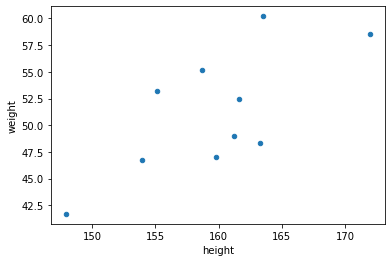

In [4]:
data_df.loc[:, ["height", "weight"]].plot(kind='scatter', x='height', y='weight')

## 共變異數

共變異數的計算：

$$
\begin{align*}
S_{xy} & = \frac{(x_1-\overline{x})(y_1-\overline{y})+(x_2-\overline{x})(y_2-\overline{y})+\text{...}+(x_n-\overline{x})(y_n-\overline{y})}{n} \newline
& = \frac{\sum_{i=1}^n{(x_i-\overline{x})(y_i-\overline{y})}}{n}
\end{align*}
$$

例：求出女大學生的身高與體重的共變異數

In [5]:
# 原始算法
mean_height = data_df.loc[:, "height"].mean()
mean_weight = data_df.loc[:, "weight"].mean()
S_xy = np.sum([(row["height"]-mean_height)*(row["weight"]-mean_weight) for _, row in data_df.loc[:, ["height", "weight"]].iterrows()]) / data_df.shape[0]
S_xy

23.729999999999976

In [6]:
# 利用 pandas.DataFrame.cov() 計算
# 註：這份資料是母體資料，計算時記得設定自由度 ddof=0
data_df.loc[:, ["height", "weight"]].cov(ddof=0)

,height,weight
height,37.96,23.7300
weight,23.73,29.7361


In [7]:
# 利用 numpy.cov() 計算
# 註 1：從 Pandas DataFrame 轉換為 Numpy Array 以前，要先轉置
# 註 2：這份資料是母體資料，計算時記得設定自由度 ddof=0
np.cov(data_df.loc[:, ["height", "weight"]].T.to_numpy(), ddof=0)

array([[37.96  , 23.73  ],
       [23.73  , 29.7361]])

## 皮爾森積動差相關係數

$$
r_{xy} = \frac{S_{xy}}{S_{x}S_{y}}
$$

其中，$S_{xy}$ 為共變異數、$S_{x}, S_{y}$ 分別為 $x, y$ 的標準差

例：求出女大學生的身高與體重的相關係數

In [8]:
# 原始算法
# 註：這份資料是母體資料，計算時記得設定自由度 ddof=0
S_x = data_df.loc[:, "height"].std(ddof=0)
S_y = data_df.loc[:, "weight"].std(ddof=0)
r_xy = S_xy / (S_x * S_y)
r_xy

0.7063055714476573

In [9]:
# 利用 pandas.DataFrame.corr() 計算
data_df.loc[:, ["height", "weight"]].corr()

,height,weight
height,1.000000,0.706306
weight,0.706306,1.000000


In [10]:
# 利用 np.corrcoef() 計算
np.corrcoef(data_df.loc[:, ["height", "weight"]].T.to_numpy().reshape(2, -1))

array([[1.        , 0.70630557],
       [0.70630557, 1.        ]])